In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Train Data.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(36168, 17)

In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.duplicated(subset = None, keep = 'first').sum()

0

In [7]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,30,self-employed,single,tertiary,no,137,yes,no,cellular,11,may,214,1,-1,0,unknown,no
36164,54,technician,divorced,secondary,no,1252,yes,no,cellular,11,may,101,1,350,1,failure,no
36165,40,management,married,tertiary,no,-17,yes,yes,cellular,11,may,474,1,256,1,success,yes
36166,45,blue-collar,married,unknown,no,-72,yes,no,cellular,11,may,306,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB


In [9]:
for col in df:
    print(col.upper(),'\n',df[col].value_counts(),'\n\n----------------------------------------------------------')

AGE 
 32    1703
31    1651
33    1569
35    1545
34    1534
      ... 
90       1
94       1
86       1
95       1
81       1
Name: age, Length: 70, dtype: int64 

----------------------------------------------------------
JOB 
 blue-collar      8166
management       7557
technician       6348
admin.           3967
services         3444
retired          1367
self-employed    1305
entrepreneur     1296
unemployed       1042
housemaid        1031
student           416
unknown           229
Name: job, dtype: int64 

----------------------------------------------------------
MARITAL 
 married     22389
single       9494
divorced     4285
Name: marital, dtype: int64 

----------------------------------------------------------
EDUCATION 
 secondary    18809
tertiary     10309
primary       5627
unknown       1423
Name: education, dtype: int64 

----------------------------------------------------------
DEFAULT 
 no     35393
yes      775
Name: default, dtype: int64 

-----------------------

In [10]:
df['day']=df['day'].astype('object')
df['campaign']=df['campaign'].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  object
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  object
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(5), object(12)
memory usage: 4.7+ MB


In [12]:
char = df.select_dtypes(include=['object'])
char.drop('y',axis=1,inplace=True)
num = df.select_dtypes(include='number')
y=df['y']

C:\Users\Anubha\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
num.head()

,age,balance,duration,pdays,previous
0,58,2143,261,-1,0
1,44,29,151,-1,0
2,33,2,76,-1,0
3,47,1506,92,-1,0
4,33,1,198,-1,0


In [14]:
char.head()

,job,marital,education,default,housing,loan,contact,day,month,campaign,poutcome
0,management,married,tertiary,no,yes,no,unknown,5,may,1,unknown
1,technician,single,secondary,no,yes,no,unknown,5,may,1,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,1,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,5,may,1,unknown
4,unknown,single,unknown,no,no,no,unknown,5,may,1,unknown


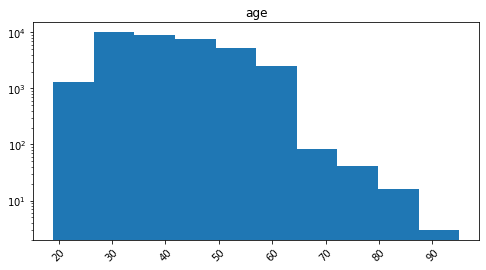

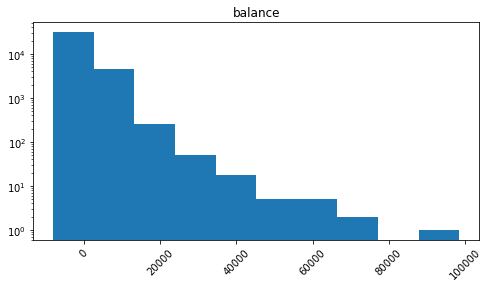

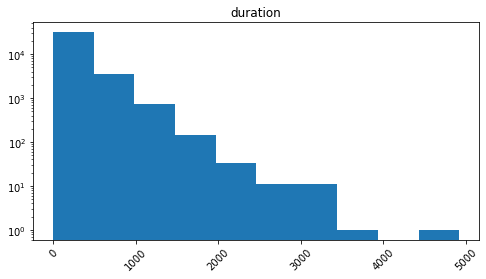

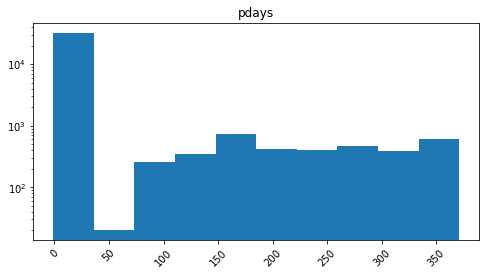

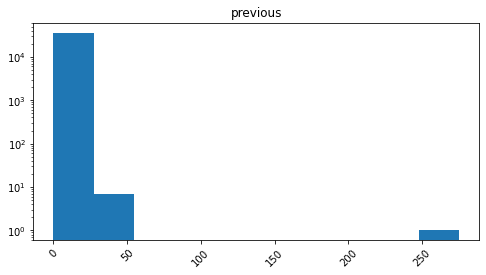

In [15]:
# data visualization for numerical columns

for col in num:
    plt.figure(figsize=(8,4))
    plt.hist(df[col],histtype='barstacked',log=True)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

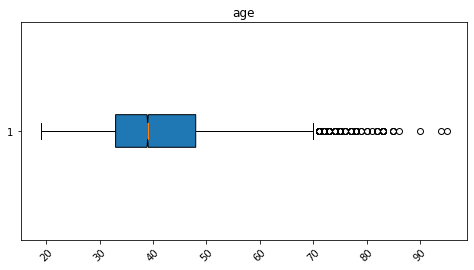

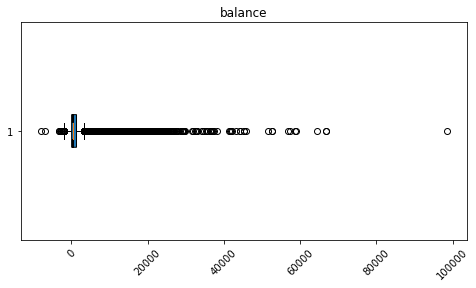

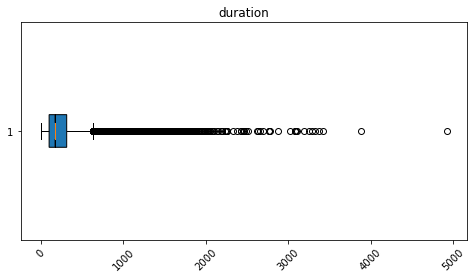

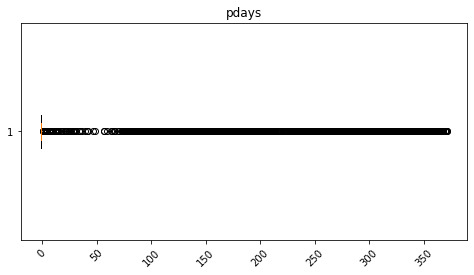

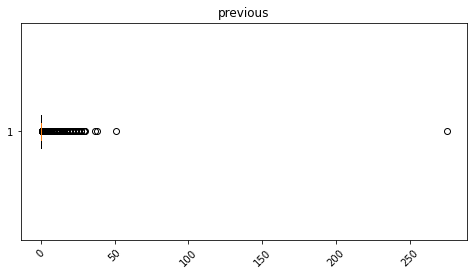

In [16]:
# PLotting Boxplot to identify outliers
for col in num:
    
    plt.figure(figsize=(8,4))
    plt.boxplot(df[col],patch_artist = True,
                notch ='True', vert = 0)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [17]:
num['balance'].value_counts()/df.shape[0]*100

0       8.402455
1       0.467264
2       0.356669
4       0.340080
3       0.298607
          ...   
2436    0.002765
8300    0.002765
3113    0.002765
6739    0.002765
4500    0.002765
Name: balance, Length: 6656, dtype: float64

In [18]:
for i in range(num.shape[0]):
    if df['balance'][i]<0:
        df['balance'][i]=0

C:\Users\Anubha\AppData\Local\Temp/ipykernel_16280/2110954850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance'][i]=0


In [19]:
num['balance'].value_counts()/df.shape[0]*100

0       8.402455
1       0.467264
2       0.356669
4       0.340080
3       0.298607
          ...   
2436    0.002765
8300    0.002765
3113    0.002765
6739    0.002765
4500    0.002765
Name: balance, Length: 6656, dtype: float64

In [20]:
num['pdays'].value_counts()/df.shape[0]*100

-1      89.443707
 343     0.121655
 182     0.118890
 170     0.113360
 167     0.113360
          ...    
 71      0.002765
 29      0.002765
 49      0.002765
 64      0.002765
 369     0.002765
Name: pdays, Length: 339, dtype: float64

In [21]:
num.drop('pdays',axis=1,inplace=True)

C:\Users\Anubha\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
num.head()

,age,balance,duration,previous
0,58,2143,261,0
1,44,29,151,0
2,33,2,76,0
3,47,1506,92,0
4,33,1,198,0


In [23]:
df['previous'].value_counts()/df.shape[0]*100

0      89.443707
1       3.826587
2       2.883765
3       1.338200
4       0.865406
5       0.494913
6       0.265428
7       0.226720
8       0.143774
9       0.118890
11      0.063592
12      0.049768
13      0.044238
10      0.038708
15      0.035943
14      0.024884
16      0.016589
17      0.013824
20      0.013824
18      0.011060
27      0.011060
23      0.011060
29      0.008295
19      0.008295
24      0.008295
25      0.008295
21      0.005530
38      0.002765
37      0.002765
51      0.002765
275     0.002765
22      0.002765
26      0.002765
30      0.002765
Name: previous, dtype: float64

In [24]:
num.drop('previous',axis=1,inplace=True)

C:\Users\Anubha\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
num.head()

,age,balance,duration
0,58,2143,261
1,44,29,151
2,33,2,76
3,47,1506,92
4,33,1,198


In [26]:
# Doing Capping and Flooring for removal of outliers
for col in num:
    percentiles = df[col].quantile([0.05, 0.95]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])

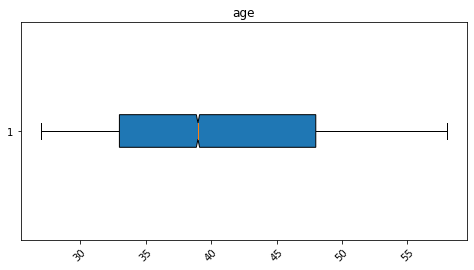

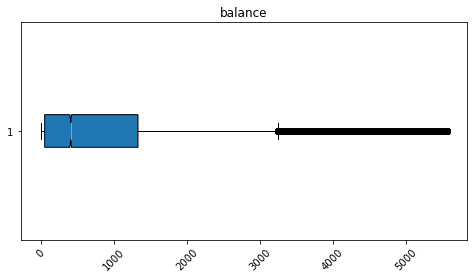

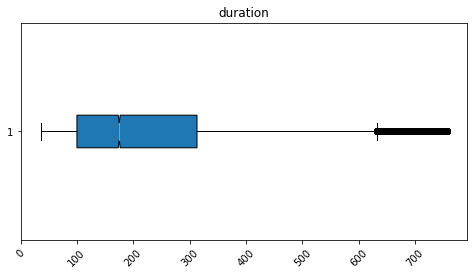

In [27]:
# PLotting Boxplot to identify outliers
for col in num:
    
    plt.figure(figsize=(8,4))
    plt.boxplot(df[col],patch_artist = True,
                notch ='True', vert = 0)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

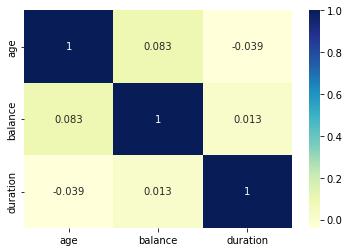

In [28]:
# Finding the relationship between the numerical variables
# Plot the correlation heatmap
sns.heatmap(num.corr(), cmap="YlGnBu", annot=True);

In [29]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [30]:
num_1.head()

,age,balance,duration
0,58,2143,261
1,44,29,151
2,33,2,76
3,47,1506,92
4,33,1,198


In [31]:
from sklearn.preprocessing import MinMaxScaler
# Data Normalization to a particular range
for col in num_1:
    num_1[[col]] = pd.DataFrame(MinMaxScaler().fit_transform(num_1[[col]]))

In [32]:
num_norm=num_1


In [33]:
num_norm.head()

,age,balance,duration
0,0.513158,0.095475,0.053070
1,0.328947,0.075614,0.030704
2,0.184211,0.075360,0.015453
3,0.368421,0.089490,0.018707
4,0.184211,0.075350,0.040260


# Going to the Categorical Columns

In [34]:
char.head()

,job,marital,education,default,housing,loan,contact,day,month,campaign,poutcome
0,management,married,tertiary,no,yes,no,unknown,5,may,1,unknown
1,technician,single,secondary,no,yes,no,unknown,5,may,1,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,1,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,5,may,1,unknown
4,unknown,single,unknown,no,no,no,unknown,5,may,1,unknown


In [35]:
for col in char:
    print(col.upper(),'\n',char[col].value_counts(),'\n\n----------------------------------------------------------')

JOB 
 blue-collar      8166
management       7557
technician       6348
admin.           3967
services         3444
retired          1367
self-employed    1305
entrepreneur     1296
unemployed       1042
housemaid        1031
student           416
unknown           229
Name: job, dtype: int64 

----------------------------------------------------------
MARITAL 
 married     22389
single       9494
divorced     4285
Name: marital, dtype: int64 

----------------------------------------------------------
EDUCATION 
 secondary    18809
tertiary     10309
primary       5627
unknown       1423
Name: education, dtype: int64 

----------------------------------------------------------
DEFAULT 
 no     35393
yes      775
Name: default, dtype: int64 

----------------------------------------------------------
HOUSING 
 yes    20857
no     15311
Name: housing, dtype: int64 

----------------------------------------------------------
LOAN 
 no     29737
yes     6431
Name: loan, dtype: int64 

---

In [36]:
# Dropping Day and Month as it is not significant and we have duration given
char1=char.drop('day',axis=1)

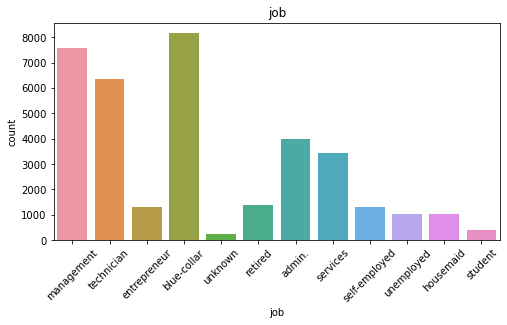

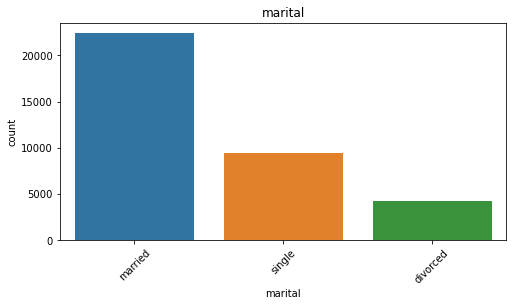

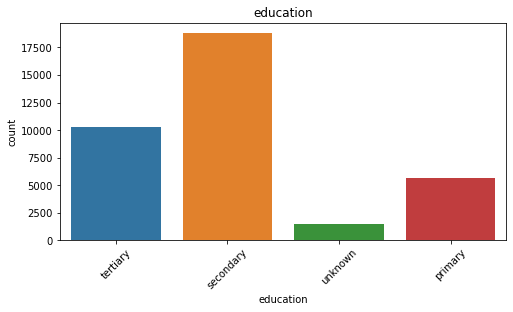

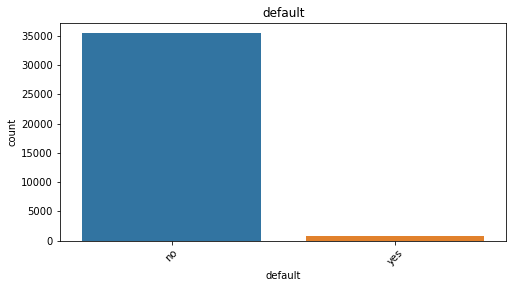

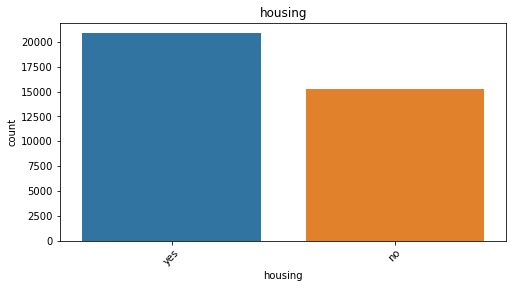

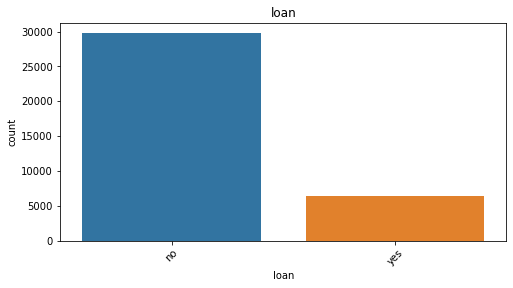

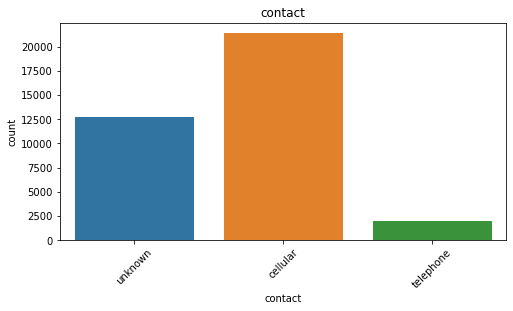

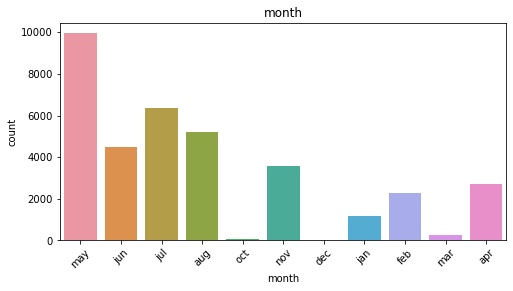

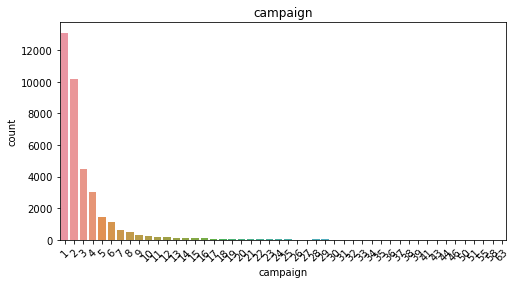

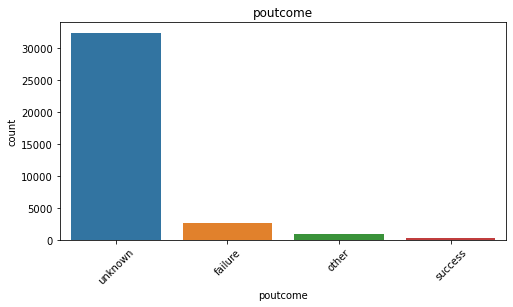

In [37]:
# data visualization for categorical columns

for col in char1:
    plt.figure(figsize=(8,4))
    sns.countplot(x=char1[col], data=df)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [38]:

# Encoding
#Define the relationship b/w features and y using chi square
# Normalize the Data
#Define the corr b/w features to each other
# Use sampling techniques if needed if there is imbalance


In [39]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for col in char1:
    char1[col]= label_encoder.fit_transform(char1[col])
 
for col in char1:
    print(char1[col].unique())

[ 4  9  2  1 11  5  0  7  6 10  3  8]
[1 2 0]
[2 1 3 0]
[0 1]
[1 0]
[0 1]
[2 0 1]
[ 8  6  5  1 10  9  2  4  3  7  0]
[ 0  1  2  4  3  5  6  7  8  9 10 11 12 18 13 23 15 31 17 21 14 16 24 20
 40 44 47 39 25 27 45 43 37 22 19 28 30 36 29 42 26 46 32 34 33 35 38 41]
[3 0 1 2]


In [40]:
char1

,job,marital,education,default,housing,loan,contact,month,campaign,poutcome
0,4,1,2,0,1,0,2,8,0,3
1,9,2,1,0,1,0,2,8,0,3
2,2,1,1,0,1,1,2,8,0,3
3,1,1,3,0,1,0,2,8,0,3
4,11,2,3,0,0,0,2,8,0,3
...,...,...,...,...,...,...,...,...,...,...
36163,6,2,2,0,1,0,0,8,0,3
36164,9,0,1,0,1,0,0,8,0,0
36165,4,1,2,0,1,1,0,8,0,2
36166,1,1,3,0,1,0,0,8,0,3


In [41]:
# Data Normalization

from sklearn.preprocessing import MinMaxScaler
# Data Normalization to a particular range
for col in char1:
    char1[[col]] = pd.DataFrame(MinMaxScaler().fit_transform(char1[[col]]))
char_norm=char1
char_norm.head()


,job,marital,education,default,housing,loan,contact,month,campaign,poutcome
0,0.363636,0.5,0.666667,0.0,1.0,0.0,1.0,0.8,0.0,1.0
1,0.818182,1.0,0.333333,0.0,1.0,0.0,1.0,0.8,0.0,1.0
2,0.181818,0.5,0.333333,0.0,1.0,1.0,1.0,0.8,0.0,1.0
3,0.090909,0.5,1.000000,0.0,1.0,0.0,1.0,0.8,0.0,1.0
4,1.000000,1.0,1.000000,0.0,0.0,0.0,1.0,0.8,0.0,1.0


In [42]:
from sklearn.feature_selection import  chi2

chi_score, pvalue = chi2(char_norm, y)
for i in range(0,char1.shape[1]):
    print(char1.columns[i], ': ', pvalue[i])

job :  0.0939173511169715
marital :  0.0494143444094575
education :  0.007231903966647605
default :  0.46160413148817836
housing :  4.784272754433111e-12
loan :  1.4604776080736262e-07
contact :  4.373863164953798e-33
month :  4.070040595952509e-07
campaign :  0.02848072590881704
poutcome :  0.6720059126611162


In [43]:
y= pd.DataFrame(label_encoder.fit_transform(df[['y']]))

C:\Users\Anubha\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
y=y[0]

In [45]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int32

# MODEL BUILDING

In [46]:
X_all=pd.concat([num_norm,char_norm],axis=1,join="inner")

In [47]:
#%pip install imblearn
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_all, y)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (67470, 13)
After OverSampling, the shape of train_y: (67470,) 

After OverSampling, counts of label '1': 33735
After OverSampling, counts of label '0': 33735


In [48]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (25317, 13)
Number transactions y_train dataset:  (25317,)
Number transactions X_test dataset:  (10851, 13)
Number transactions y_test dataset:  (10851,)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10114
           1       0.56      0.18      0.27       737

    accuracy                           0.93     10851
   macro avg       0.75      0.59      0.62     10851
weighted avg       0.92      0.93      0.92     10851



In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10114
           1       0.56      0.33      0.42       737

    accuracy                           0.94     10851
   macro avg       0.75      0.66      0.69     10851
weighted avg       0.93      0.94      0.93     10851



# Among the two models above, we can observe that GradientBoostingClassifier peforms better by 1 % than the Logistic Regression